# Proyek Analisis Data: Air Quality Dataset
sumber: https://github.com/marceloreis/HTI/tree/master/PRSA_Data_20130301-20170228

- Nama: Maulana Ridhwan Riziq
- Email: mlnrdrz@gmail.com
- Coding Camp Email Username: mc295d5y1155@student.devacademy.id
- ID Dicoding: MC295D5Y1155

## Menentukan Pertanyaan Bisnis
- Bagaimana perbedaan tingkat polusi udara antara pusat kota (Aotizhongxin) dan pinggiran kota (Changping)
- Bagaimana hubungan antara faktor cuaca dengan tingkat polusi udara di masing-masing wilayah?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

In [4]:
folder_path = "C:/Users/didan/proyek_analisis_data/submission/data" 

# Load dataset
aotizhongxin_df = pd.read_csv("C:/Users/didan/proyek_analisis_data/submission/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("C:/Users/didan/proyek_analisis_data/submission/data/PRSA_Data_Changping_20130301-20170228.csv")

aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


- Date/Time: Tahun, bulan, hari, jam pengukuran.
- PM2.5 (µg/m³): Konsentrasi partikel halus yang berbahaya bagi pernapasan.
- PM10 (µg/m³): Partikel kasar yang dapat menyebabkan masalah pernapasan.
- SO2 (Sulfur Dioksida, µg/m³): Gas pencemar udara dari pembakaran bahan bakar fosil.
- NO2 (Nitrogen Dioksida, µg/m³): Polutan utama dari emisi kendaraan.
- CO (Karbon Monoksida, mg/m³): Gas beracun yang dihasilkan dari pembakaran tidak sempurna.
- O3 (Ozon, µg/m³): Polutan yang terbentuk dari reaksi kimia antara NOx dan senyawa organik volatil.
- TEMP (°C): Suhu udara.
- PRES (hPa): Tekanan atmosfer.
- DEWP (°C): Titik embun.
- RAIN (mm): Curah hujan.
- WSPM (m/s): Kecepatan angin.
- WD (Arah Angin): Arah angin dalam bentuk kategori (misalnya, N, NE, E, SE, dll.).
- Station: Nama stasiun pemantauan (tergantung pada file).

### Assessing Data

In [5]:
# Cek informasi awal
print(aotizhongxin_df.info())
print(changping_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries

In [6]:
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())
print("Jumlah duplikasi: ", changping_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [7]:
# Cek jumlah missing values
print(aotizhongxin_df.isnull().sum())
print(' ')
print(changping_df.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
 
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


In [8]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [9]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Data Cleaning

In [10]:
# Konversi ke datetime
for df in [aotizhongxin_df, changping_df]:
    df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

In [11]:
# Set datetime sebagai index
aotizhongxin_df.set_index("datetime", inplace=True)
changping_df.set_index("datetime", inplace=True)

In [12]:
# Mengisi missing values dengan interpolasi
for df in [aotizhongxin_df, changping_df]:
    df.interpolate(method="linear", inplace=True)

C:\Users\didan\AppData\Local\Temp\ipykernel_1904\2012121572.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear", inplace=True)
C:\Users\didan\AppData\Local\Temp\ipykernel_1904\2012121572.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear", inplace=True)


In [13]:
# Tambah kolom lokasi
aotizhongxin_df["station"] = "Aotizhongxin"
changping_df["station"] = "Changping"

In [14]:
changping_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-04-22 20:00:00,1269,2013,4,22,20,210.000000,217.000000,59.0,65.0,1500.0,32.0,13.7,1003.6,7.0,0.0,NE,0.4,Changping
2016-08-02 19:00:00,30020,2016,8,2,19,15.000000,27.000000,2.0,13.0,600.0,133.0,32.6,999.2,20.5,0.0,ESE,1.4,Changping
2015-10-06 11:00:00,22788,2015,10,6,11,35.988095,52.468966,8.0,101.0,1500.0,34.0,22.5,1008.8,14.1,0.0,E,1.6,Changping
2013-11-24 02:00:00,6435,2013,11,24,2,54.000000,71.000000,39.0,49.0,900.0,4.0,8.9,1009.6,-6.1,0.0,N,2.1,Changping
2014-06-19 23:00:00,11424,2014,6,19,23,75.000000,82.000000,2.0,34.0,900.0,78.0,21.5,997.3,18.9,0.5,NNE,1.0,Changping


In [15]:
# memastikan datetime tidak duplikat sebelum reset index
if "datetime" in aotizhongxin_df.columns:
    aotizhongxin_df = aotizhongxin_df.drop(columns=["datetime"])
if "datetime" in changping_df.columns:
    changping_df = changping_df.drop(columns=["datetime"])

# Reset index
aotizhongxin_reset = aotizhongxin_df.reset_index()
changping_reset = changping_df.reset_index()

In [16]:
aotizhongxin_reset.head()

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [17]:
# Gabungkan dataset
df_combined = pd.concat([aotizhongxin_reset, changping_reset], ignore_index=True)
df_combined.tail(5)

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
70123,2017-02-28 19:00:00,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,33.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
70124,2017-02-28 20:00:00,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
70125,2017-02-28 21:00:00,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
70126,2017-02-28 22:00:00,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping
70127,2017-02-28 23:00:00,35064,2017,2,28,23,20.0,25.0,6.0,28.0,900.0,54.0,7.0,1009.4,-12.2,0.0,N,1.9,Changping


In [18]:
df_combined.head(3)

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


## Exploratory Data Analysis (EDA)

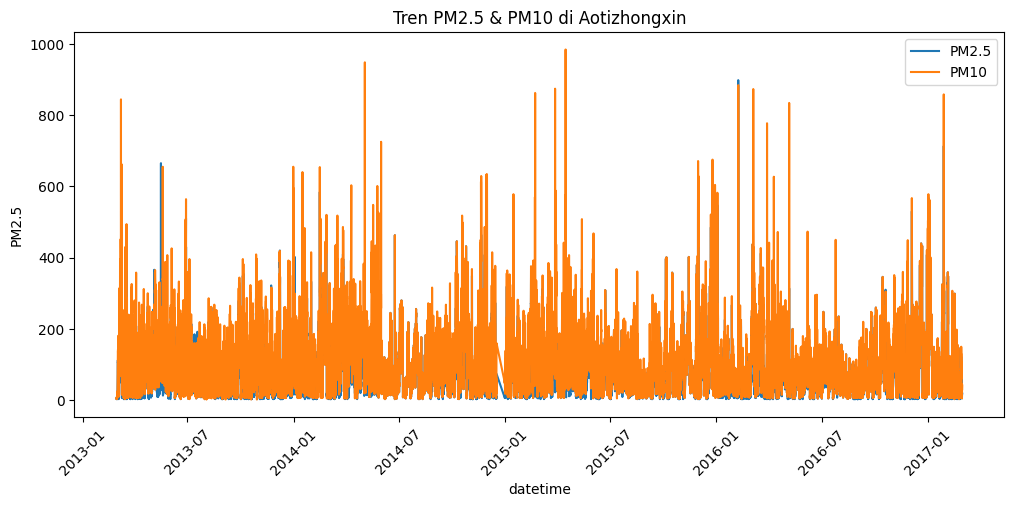

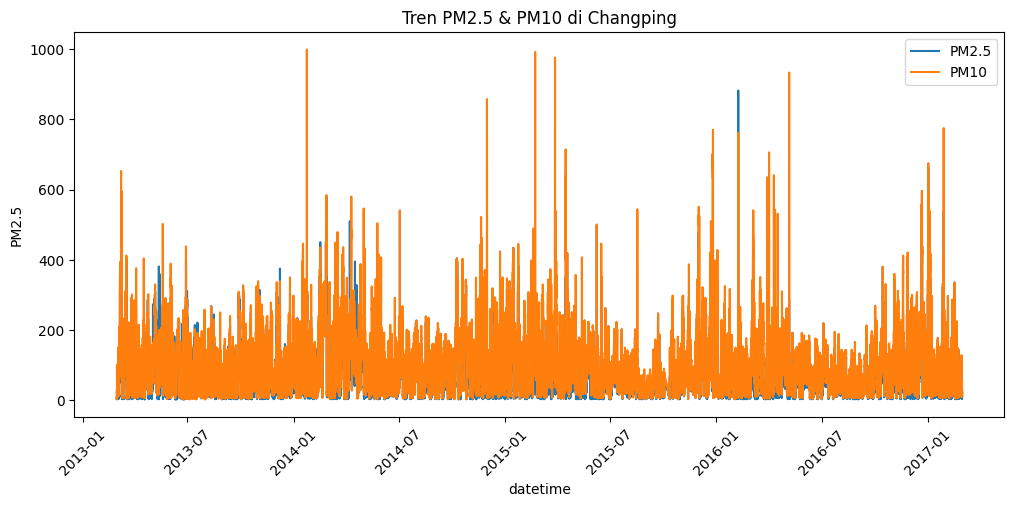

In [19]:
# Plot Aotizhongxin
plt.figure(figsize=(12, 5))
sns.lineplot(data=aotizhongxin_df, x=aotizhongxin_df.index, y="PM2.5", label="PM2.5")
sns.lineplot(data=aotizhongxin_df, x=aotizhongxin_df.index, y="PM10", label="PM10")
plt.title("Tren PM2.5 & PM10 di Aotizhongxin")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot Changping
plt.figure(figsize=(12, 5))
sns.lineplot(data=changping_df, x=changping_df.index, y="PM2.5", label="PM2.5")
sns.lineplot(data=changping_df, x=changping_df.index, y="PM10", label="PM10")
plt.title("Tren PM2.5 & PM10 di Changping")
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Insight
Tren PM2.5 & PM10 di Aotizhongxin:
- Grafik menunjukkan puncak-puncak polusi yang relatif sering dan cukup tinggi, dengan beberapa lonjakan mencapai di atas 600–800 µg/m³.
- PM10 cenderung lebih tinggi secara keseluruhan, tetapi PM2.5 juga memperlihatkan fluktuasi signifikan.
- Lonjakan ekstrem umumnya terjadi saat musim dingin (sekitar Desember–Januari), yang kemungkinan terkait dengan pemanasan ruangan, dan peningkatan emisi dari transportasi serta aktivitas industri di pusat kota.

Tren PM2.5 & PM10 di Changping:
- Meski masih terlihat lonjakan polusi, frekuensi dan magnitudo puncak di Changping umumnya lebih rendah dibandingkan Aotizhongxin.
- Hal ini mengindikasikan bahwa wilayah pinggiran relatif memiliki kualitas udara yang sedikit lebih baik, walau tetap mengalami polusi tinggi pada periode tertentu.
- Pola musiman (terutama pada musim dingin) masih terlihat, meski tidak setinggi di Aotizhongxin.

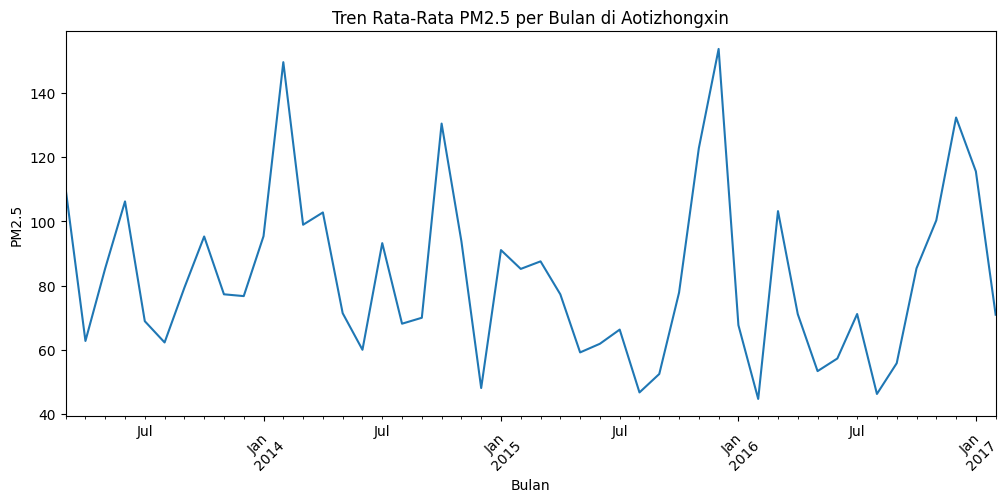

In [20]:
aotizhongxin_df["datetime"] = pd.to_datetime(aotizhongxin_df[["year", "month", "day", "hour"]])
monthly_pm25 = aotizhongxin_df.groupby(aotizhongxin_df["datetime"].dt.to_period("M"))["PM2.5"].mean()

plt.figure(figsize=(12, 5))
monthly_pm25.plot()
plt.title("Tren Rata-Rata PM2.5 per Bulan di Aotizhongxin")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.xticks(rotation=45)
plt.show()

### Insight
- Grafik bulanan memperlihatkan puncak-puncak polusi yang cenderung terjadi pada musim dingin (sekitar Desember–Januari), dengan nilai rata-rata bulanan bisa melampaui 120–140 µg/m³.
- Fluktuasi dari tahun ke tahun juga cukup besar, beberapa tahun misalnya awal 2014 tampak lebih rendah dibanding periode musim dingin tahun berikutnya.
- Hal ini menegaskan bahwa kondisi cuaca dan aktivitas manusia (misalnya penggunaan pemanas, emisi transportasi) turut berperan dalam meningkatkan konsentrasi polusi pada bulan-bulan tertentu.

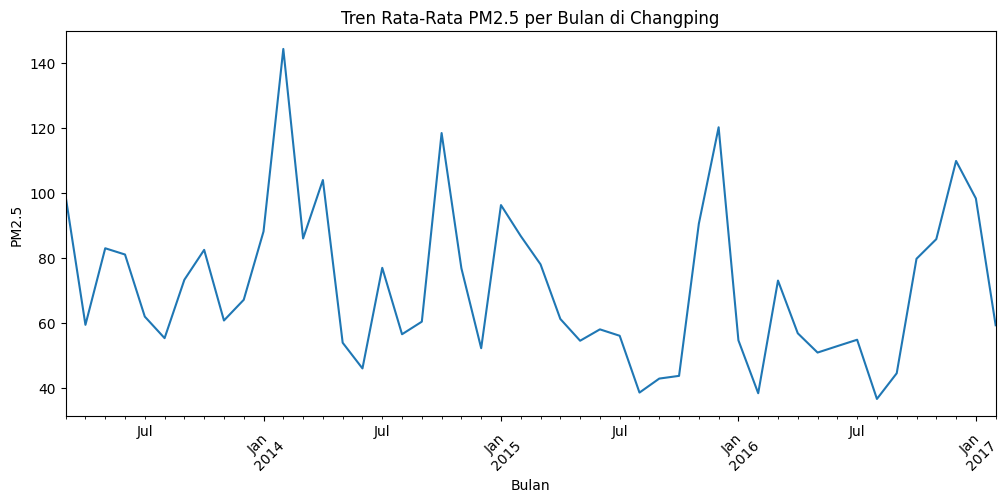

In [21]:
changping_df["datetime"] = pd.to_datetime(changping_df[["year", "month", "day", "hour"]])
monthly_pm25c = changping_df.groupby(changping_df["datetime"].dt.to_period("M"))["PM2.5"].mean()

plt.figure(figsize=(12, 5))
monthly_pm25c.plot()
plt.title("Tren Rata-Rata PM2.5 per Bulan di Changping")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.xticks(rotation=45)
plt.show()

### Insight
- Meski juga memiliki puncak polusi di musim dingin (sampai 120–140 µg/m³), intensitasnya terlihat sedikit lebih bervariasi.
- Beberapa periode menunjukkan penurunan signifikan, terutama di musim semi atau musim panas, yangmenandakan curah hujan mungkin lebih efektif dalam membersihkan polutan di wilayah pinggiran.
- Secara umum, Changping cenderung memiliki rata-rata PM2.5 bulanan yang lebih rendah dibanding Aotizhongxin.

## Visualization & Explanatory Analysis

### Bagaimana perbedaan tingkat polusi udara antara pusat kota (Aotizhongxin) dan pinggiran kota (Changping)?

C:\Users\didan\AppData\Local\Temp\ipykernel_1904\4121192058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='PM2.5', data=df_combined, palette='Set2')


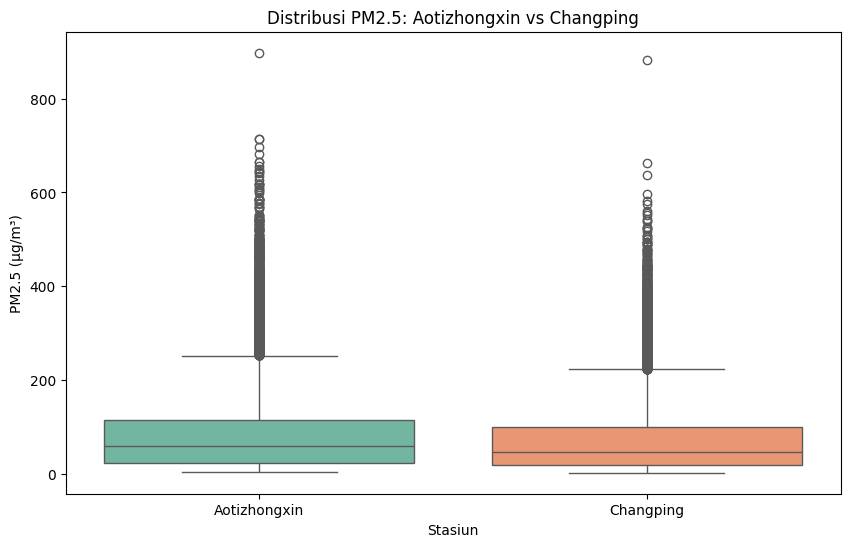

C:\Users\didan\AppData\Local\Temp\ipykernel_1904\4121192058.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='PM10', data=df_combined, palette='Set2')


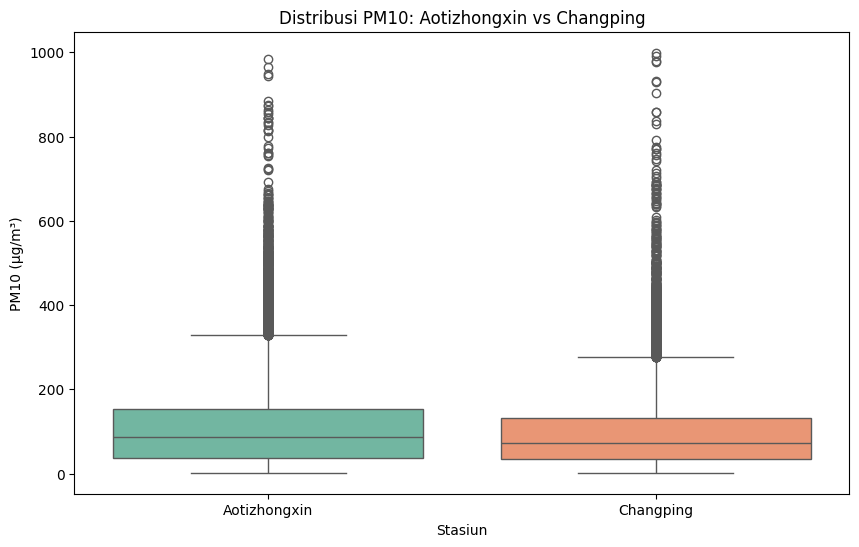

In [22]:
# Visualisasi Boxplot untuk PM2.5
plt.figure(figsize=(10,6))
sns.boxplot(x='station', y='PM2.5', data=df_combined, palette='Set2')
plt.title("Distribusi PM2.5: Aotizhongxin vs Changping")
plt.xlabel("Stasiun")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# Visualisasi Boxplot untuk PM10
plt.figure(figsize=(10,6))
sns.boxplot(x='station', y='PM10', data=df_combined, palette='Set2')
plt.title("Distribusi PM10: Aotizhongxin vs Changping")
plt.xlabel("Stasiun")
plt.ylabel("PM10 (µg/m³)")
plt.show()

#### Insight
- Aotizhongxin memiliki median PM2.5 dan PM10 yang sedikit lebih tinggi daripada Changping. Hal ini menunjukkan pusat kota cenderung memiliki tingkat polusi yang lebih besar.
- Banyaknya outlier dengan nilai ekstrem (di atas 600–800 µg/m³) di kedua stasiun menandakan adanya momen-momen polusi tinggi. Namun, frekuensi outlier di Aotizhongxin tampak lebih padat yang menegaskan bahwa konsentrasi polusi ekstrem lebih sering terjadi di pusat kota.
- Secara umum, rata-rata dan sebaran polusi di Aotizhongxin lebih tinggi dibandingkan Changping, mendukung kesimpulan bahwa area perkotaan memiliki polusi yang lebih parah.

### Bagaimana hubungan antara faktor cuaca dengan tingkat polusi udara di masing-masing wilayah?

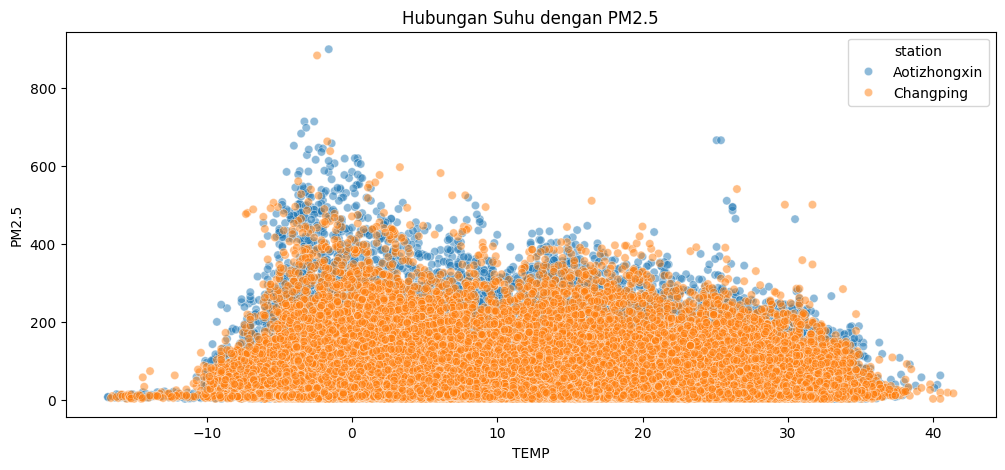

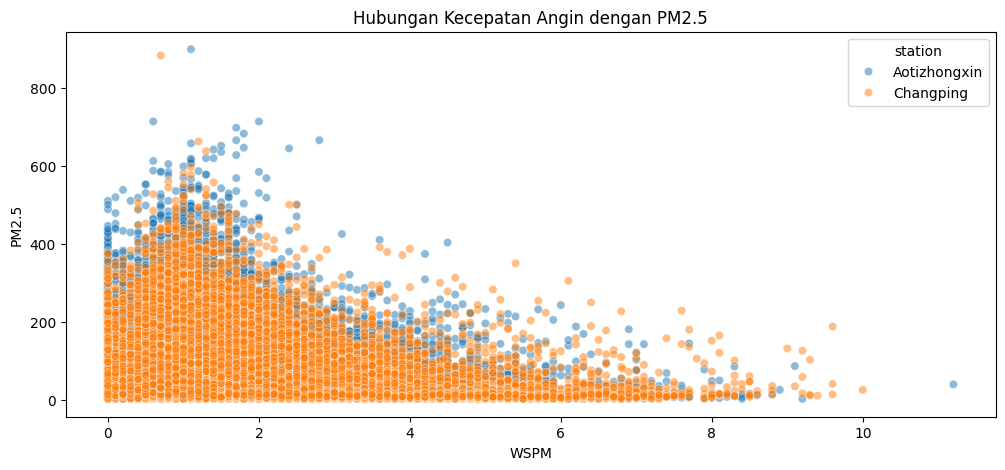

In [23]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_combined, x="TEMP", y="PM2.5", hue="station", alpha=0.5)
plt.title("Hubungan Suhu dengan PM2.5")
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_combined, x="WSPM", y="PM2.5", hue="station", alpha=0.5)
plt.title("Hubungan Kecepatan Angin dengan PM2.5")
plt.show()


#### Insight
Hubungan Suhu:
- Pola penyebaran data tidak menunjukkan korelasi linear yang kuat antara suhu dan PM2.5.
- Pada suhu rendah maupun tinggi, masih terdapat nilai PM2.5 yang tinggi maupun rendah, sehingga suhu tidak menjadi penentu tunggal.
- Secara umum, titik-titik pola Aotizhongxin terlihat sedikit lebih tersebar di rentang PM2.5 yang tinggi, tetapi keseluruhan pola cukup mirip dengan Changping.

Hubungan angin:
- Terlihat pola negatif yang lebih jelas, semakin tinggi kecepatan angin, konsentrasi PM2.5 cenderung menurun.
- Pada WSPM rendah (0–2 m/s), banyak titik dengan PM2.5 sangat tinggi (hingga 600–800 µg/m³).
- Aotizhongxin cenderung memiliki PM2.5 lebih tinggi, namun pola penurunan saat WSPM meningkat juga terjadi di Changping.

Berdasarkan kedua diagram scatter di atas, terlihat bahwa kecepatan angin (WSPM) memiliki pengaruh yang lebih jelas terhadap tingkat polusi udara (PM2.5) di Aotizhongxin dan Changping, di mana peningkatan kecepatan angin cenderung menurunkan konsentrasi PM2.5 karena polutan lebih mudah terdifusi atau terdispersi. Sementara itu, titik-titik data menunjukkan bahwa pada suhu yang ekstrem (sangat rendah atau sangat tinggi), polusi tidak mencapai level yang paling tinggi, sehingga masih ada indikasi bahwa suhu dapat memengaruhi polusi secara tidak langsung.

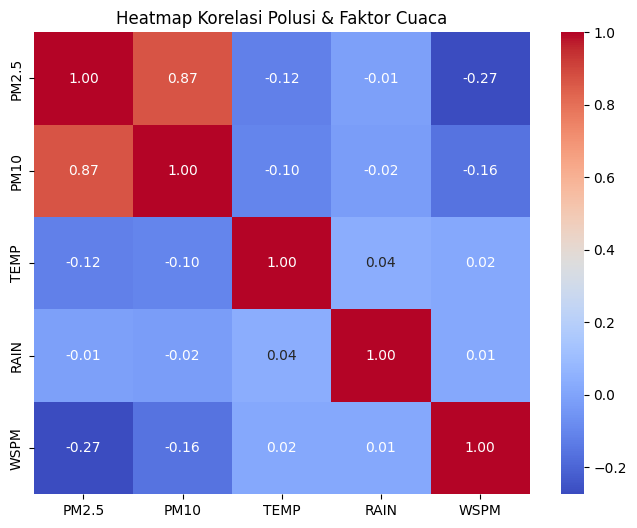

In [24]:
# Hitung korelasi antar variabel
correlation_matrix = df_combined[["PM2.5", "PM10", "TEMP", "RAIN", "WSPM"]].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Polusi & Faktor Cuaca")
plt.show()


#### Insight
Korelasi variabel:
- PM2.5 & PM10 berkorelasi tinggi (0.87), menandakan keduanya sering meningkat atau menurun bersama.
- Kecepatan angin (WSPM) memiliki korelasi negatif yang cukup jelas terhadap PM2.5 dan PM10 (sekitar –0.27 dan –0.16), mendukung kesimpulan dari scatter plot bahwa angin berperan penting dalam menurunkan polusi.
- Suhu (TEMP) dan Hujan (RAIN) memiliki korelasi lemah terhadap polusi (–0.12 dan 0.02 pada PM2.5), sehingga efeknya tidak terlalu dominan.

Heatmap korelasi di atas menegaskan temuan dari scatter plot sebelumnya bahwa kecepatan angin (WSPM) memiliki pengaruh paling kuat terhadap tingkat polusi. Hal ini terlihat dari korelasi negatif yang cukup signifikan antara WSPM dengan PM2.5 (-0.27) dan PM10 (-0.16) yang menandakan bahwa semakin tinggi kecepatan angin, semakin rendah konsentrasi polusi udara. Sebaliknya, suhu (TEMP) hanya memiliki korelasi negatif lemah terhadap PM2.5 (-0.12) dan PM10 (-0.10), sehingga peran suhu dalam menurunkan atau meningkatkan polusi tidak terlalu besar. Hujan (RAIN) bahkan menunjukkan korelasi yang hampir nol (0.02 dengan PM2.5 dan 0.04 dengan PM10) dan mengindikasikan bahwa curah hujan dalam dataset ini tidak secara konsisten memengaruhi kadar polusi. Selain itu, korelasi yang tinggi antara PM2.5 dan PM10 (0.87) menunjukkan bahwa kedua jenis polutan ini cenderung meningkat dan menurun secara bersamaan. Dengan ini, dapat disimpulkan bahwa kecepatan angin menjadi faktor cuaca paling dominan dalam memengaruhi tingkat polusi di kedua wilayah, sementara suhu dan hujan tidak menunjukkan pengaruh yang signifikan.

## Analisis Lanjutan

In [25]:
# Definisikan koordinat untuk masing-masing stasiun
locations = {
    "Aotizhongxin": [39.982, 116.417],
    "Changping": [40.218, 116.231]
}

# Tambahkan kolom lat dan lon ke dataframe berdasarkan kolom 'station'
df_combined["lat"] = df_combined["station"].map(lambda x: locations[x][0])
df_combined["lon"] = df_combined["station"].map(lambda x: locations[x][1])


In [26]:
# Buat peta dasar dengan lokasi tengah (Beijing)
m = folium.Map(location=[39.9, 116.4], zoom_start=10)

In [27]:
m

In [28]:
# Hitung rata-rata PM2.5 per stasiun
avg_pm25 = df_combined.groupby("station")["PM2.5"].mean()

# Tambahkan marker untuk masing-masing stasiun
for station, coords in locations.items():
    folium.CircleMarker(
        location=coords,
        radius=avg_pm25[station] / 10,
        popup=f"{station}: {avg_pm25[station]:.2f} µg/m³",
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6
    ).add_to(m)


In [29]:
m

Dengan peta di atas, kita dapat membandingkan lokasi kedua stasiun. Marker menunjukkan rata-rata tingkat polusi (PM2.5) di masing-masing stasiun. Jika marker di Aotizhongxin memiliki radius yang lebih besar atau nilai rata-rata yang lebih tinggi dibandingkan dengan Changping, ini mengindikasikan bahwa polusi di pusat kota (Aotizhongxin) lebih tinggi.

In [34]:
df_combined.to_csv("C:/Users/didan/proyek_analisis_data/submission/dashboard/combined_data.csv", index=False)

## Conclusion

### Bagaimana perbedaan tingkat polusi udara antara pusat kota (Aotizhongxin) dan pinggiran kota (Changping)?

Terdapat perbedaan signifikan pada distribusi polusi PM2.5 dan PM10 antara pusat kota Aotizhongxin dan pinggiran Changping. Pusat kota lebih sering mengalami outlier ekstrem dan lebih sering mengalami polusi lebih tinggi, yang kemungkinan dipicu oleh aktivitas industri, transportasi, dan kepadatan penduduk, dibanding Changping.

### Bagaimana hubungan antara faktor cuaca (suhu, hujan, kecepatan angin) dengan tingkat polusi udara di masing-masing wilayah?

Faktor cuaca yang paling berpengaruh terhadap polusi adalah kecepatan angin. Semakin tinggi angin, semakin rendah konsentrasi PM2.5. Sedangkan suhu dan hujan tidak menunjukkan korelasi kuat terhadap polusi, sehingga perannya lebih kompleks atau tidak konsisten.

------